# 数据准备

## 数据预处理

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%config InlineBackend.figure_format='retina'

In [27]:
from help import read_data, data_preprocess
train, test, store = read_data()
X, y, X_predict = data_preprocess(train, test, store)
y.loc[y==0] = 10**(-100)
y.loc[:] = np.log(y)
del train, test, store

Loading train data...


//anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Loading test data...
Loading store data...
  Successfully read data as: train, test, store.

Preprocessing training data...
  Successfully preprocess training data.

Preprocessing testing data...
  Successfully preprocess testing data.



//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 数据划分

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=520)

# 变量选择

## Lasso

In [86]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=5,random_state=101,alphas=[0.005])
regr.fit(X_train,y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
print("Variables Eliminated: ", sum(regr.coef_==0))
print("Variables Kept: ", sum(regr.coef_!=0))
X.columns[regr.coef_!=0]

LassoCV Best Alpha Scored:  0.005
LassoCV Model Accuracy:  0.9996231082526109
Variables Eliminated:  18
Variables Kept:  15


Index(['Month', 'Year', 'DayOfWeek', 'Open', 'CompetitionDistance',
       'CompetitionOpenTime', 'Promo', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval_Dec', 'PromoInterval_Jun', 'PromoInterval_Mar',
       'PromoInterval_Sept', 'StoreType_a', 'Assortment_a'],
      dtype='object')

In [89]:
X_reduce = X[X.columns[regr.coef_!=0]]
X_train_reduce, X_test_reduce, y_train, y_test = train_test_split(X_reduce, y, random_state=520)

# 模型

[定义评分函数：](https://www.cnblogs.com/harvey888/p/6964741.html)

In [29]:
from help import rmspe
from sklearn.metrics import make_scorer
respe_scorer = make_scorer(rmspe, greater_is_better=False)

## 多元回归

### 线性回归*

In [114]:
from sklearn.linear_model import LinearRegression
Linear_Model = LinearRegression()
Linear_Model.fit(X_train, y_train)

Model = Linear_Model
FileName = 'Linear_Model'
from help import save_model
save_model(Model, FileName, Best_Model=False)

from help import train_test_score
train_test_score(Model, X=X, y=y)

The Model have been save in  ['Model_Parameter/Linear_Model.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.039930191515260414 

Calculating test score...
  test rmspe score:  0.039646931303106286 



In [115]:
from sklearn.linear_model import LinearRegression
Linear_Model_reduce = LinearRegression()
Linear_Model_reduce.fit(X_train_reduce, y_train)

Model = Linear_Model_reduce
FileName = 'Linear_Model_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

from help import train_test_score
train_test_score(Model, X=X_reduce, y=y)

The Model have been save in  ['Model_Parameter/Linear_Model_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.04027399109836098 

Calculating test score...
  test rmspe score:  0.039974165230658436 



### 多项式回归*

In [9]:
# fit model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Ploy_Res_Model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
Ploy_Res_Model.fit(X_train[:10000], y_train[:10000])

# save model
Model = Ploy_Res_Model
FileName = 'Ploy_Res_Model'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, train_size=10000, X=X, y=y) 

The Model have been save in  'Model_Parameter/Ploy_Res_Model.pkl'
  To load model, use command: 'Model = joblib.load(FileName)'.


Calculating train store...
  train rmspe score:  0.3533598283992259 

Calculating test store...
  test rmspe score:  2976824667.081335


In [111]:
# fit model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Ploy_Res_Model_reduce = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])
Ploy_Res_Model_reduce.fit(X_train_reduce[:10000], y_train[:10000])

# save model
Model = Ploy_Res_Model_reduce
FileName = 'Ploy_Res_Model_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, train_size=10000, X=X_reduce, y=y) 

The Model have been save in  ['Model_Parameter/Ploy_Res_Model_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.03793950025678068 

Calculating test score...
  test rmspe score:  0.038927646242837066 



### 岭回归**

In [5]:
from sklearn.linear_model import SGDRegressor
Ridge_Sgd_Reg = SGDRegressor(tol=-np.infty, penalty="l2", random_state=42)
print('Fitting Model...')
Ridge_Sgd_Reg.fit(X_train, y_train)

# save model
Model = Ridge_Sgd_Reg
FileName = 'Ridge_Sgd_Reg'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, X=X, y=y) 

Fitting Model...
The Model have been save in  'Model_Parameter/Ridge_Sgd_Reg.pkl'
  PS: To load model, use command: 'Model = joblib.load(FileName)'.
Calculating train score...
  train rmspe score:  0.4759495728341807 

Calculating test score...
  test rmspe score:  0.439072290557874


速度慢 但效果还行

In [117]:
from sklearn.linear_model import SGDRegressor
Ridge_Sgd_Reg_reduce = SGDRegressor(tol=-np.infty, penalty="l2", random_state=42)
print('Fitting Model...')
Ridge_Sgd_Reg_reduce.fit(X_train_reduce, y_train)

# save model
Model = Ridge_Sgd_Reg_reduce
FileName = 'Ridge_Sgd_Reg_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, X=X_reduce, y=y) 

Fitting Model...
The Model have been save in  ['Model_Parameter/Ridge_Sgd_Reg_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.040297031212253885 

Calculating test score...
  test rmspe score:  0.03999452595046517 



## SVR

### LinearSVR

速度快，但是效果不咋地

In [37]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1000,1500,2000],
              'epsilon': [1300,1400,1500],}

Linear_SVR_grid_search = GridSearchCV(LinearSVR(max_iter=1000), parameters, cv=5, 
                                      n_jobs=-1, return_train_score=True,
                                     scoring=respe_scorer)
print('Fitting model...\n')
Linear_SVR_grid_search.fit(X_train[:10000], y_train[:10000])

# save model
Model = Linear_SVR_grid_search
FileName = 'Linear_SVR_grid_search'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, X=X, y=y) 

Fitting model...

Linear_SVR_grid_search.best_estimator_:
   LinearSVR(C=1500, dual=True, epsilon=1500, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0) 

The Model have been save in  ['Model_Parameter/Linear_SVR_grid_search.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.44801640881838956 

Calculating test score...
  test rmspe score:  0.4126090394344046 



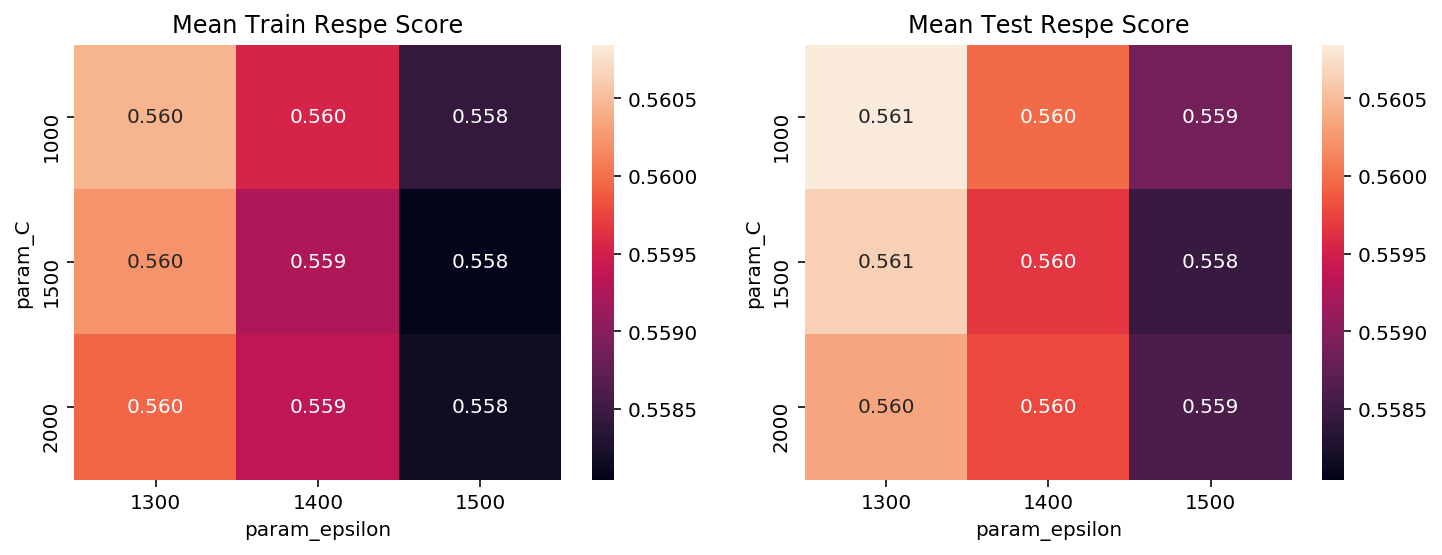

In [38]:
from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())],same_axis=True)

In [127]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1000,1500,2000],
              'epsilon': [1300,1400,1500],}

Linear_SVR_grid_search_reduce = GridSearchCV(LinearSVR(max_iter=1000), parameters, cv=5, 
                                             return_train_score=True, scoring=respe_scorer)
print('Fitting model...\n')
Linear_SVR_grid_search_reduce.fit(X_train_reduce[:10000], y_train[:10000])

# save model
Model = Linear_SVR_grid_search_reduce
FileName = 'Linear_SVR_grid_search_reduce'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, X=X_reduce, y=y) 

Fitting model...

Linear_SVR_grid_search_reduce.best_estimator_:
   LinearSVR(C=1000, dual=True, epsilon=1300, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0) 

The Model have been save in  ['Model_Parameter/Linear_SVR_grid_search_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  1.0 

Calculating test score...
  test rmspe score:  1.0 



### KernelSVR

结论：都不怎么行，且速度慢

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['rbf', 'poly'],
              'epsilon': [0, 0.01, 0.1, 1, 10],
              'degree': [1, 3, 5, 7],}

SVR_grid_search = GridSearchCV(SVR(C=1,gamma='auto',max_iter=-1),
                               param_grid, cv=5, n_jobs=-1, 
                               return_train_score=True,
                               scoring=respe_scorer)
print('Fitting model...\n')
SVR_grid_search.fit(X_train[:6000], y_train[:6000])

# save model
Model = SVR_grid_search
FileName = 'SVR_grid_search'
from help import save_model
save_model(Model, FileName)

# print score
from help import train_test_score
train_test_score(Model, train_size=6000, X=X, y=y) 

Fitting model...

SVR_grid_search.best_estimator_:
   SVR(C=1, cache_size=200, coef0=0.0, degree=1, epsilon=10, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

The Model have been save in  ['Model_Parameter/SVR_grid_search.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.4162627670917894 

Calculating test score...
  test rmspe score:  0.42403776621861944 



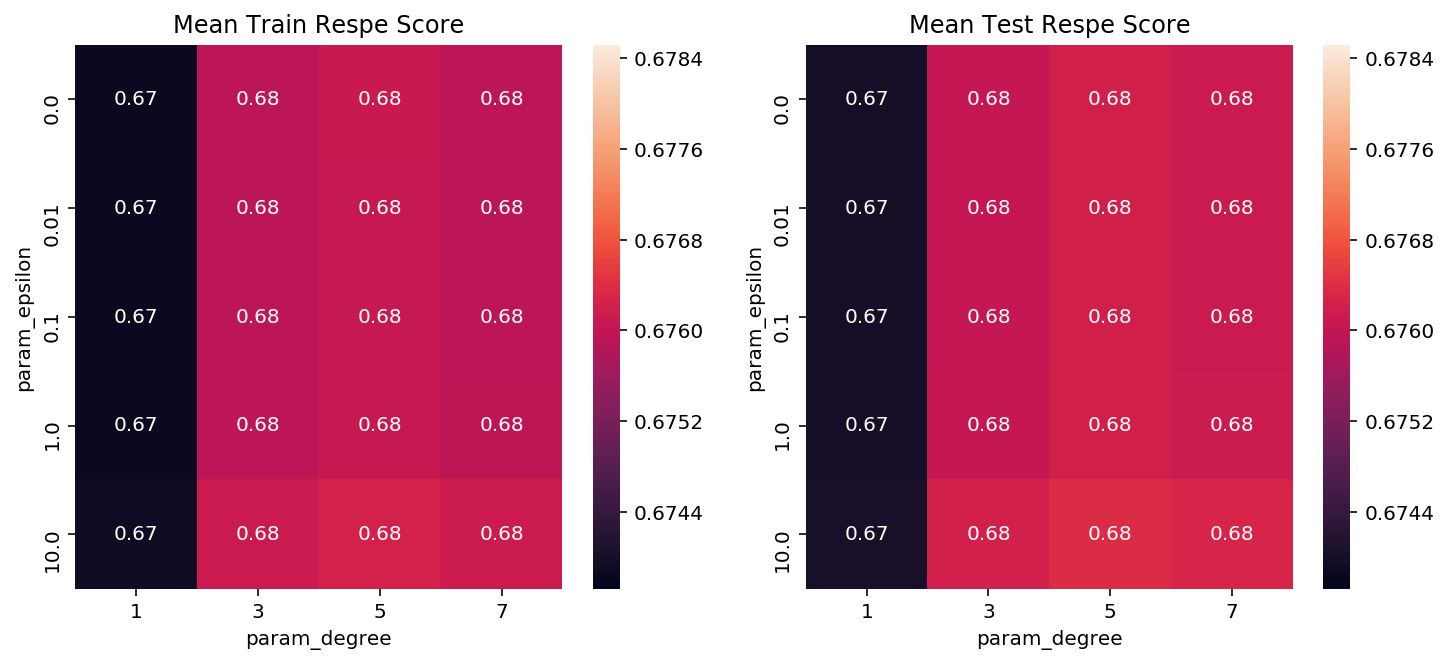

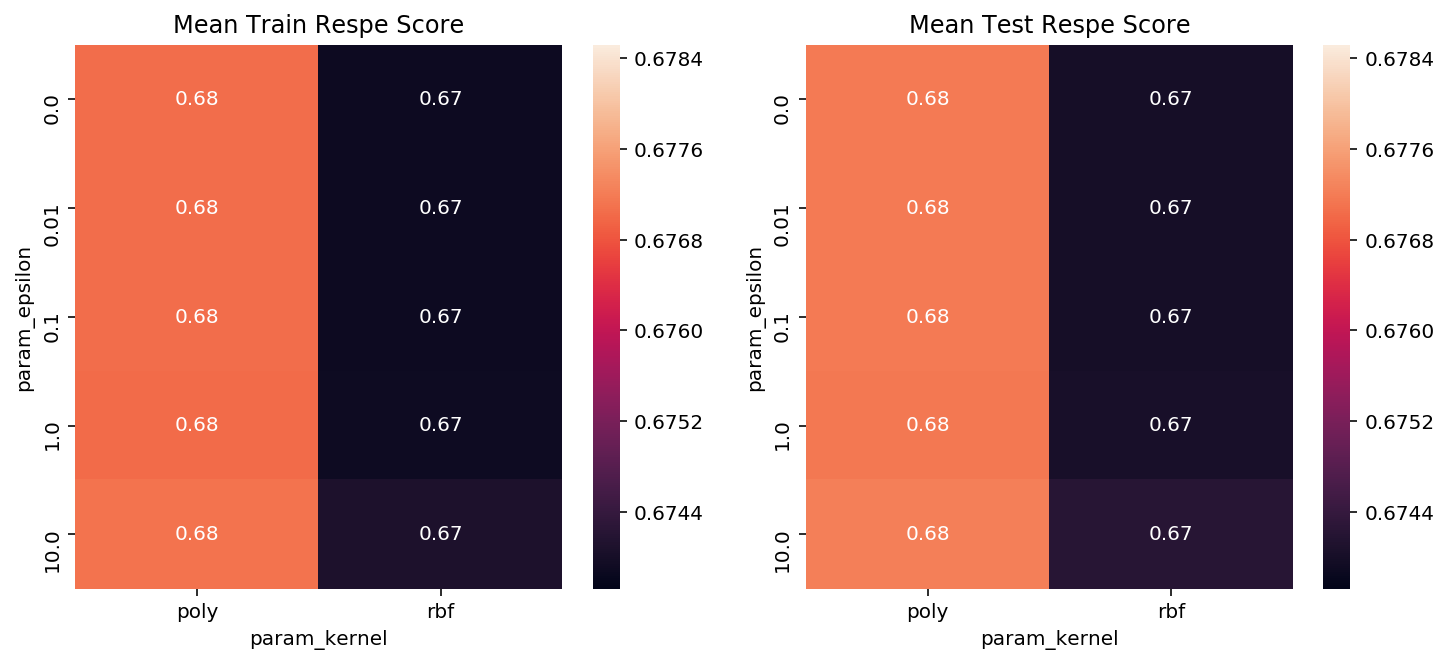

In [17]:
from help import visual_result
visual_result(Model, ['param_epsilon','param_degree'])
visual_result(Model, ['param_epsilon','param_kernel'])

In [125]:
from sklearn.svm import SVR

Kernel_SVR_reduce = SVR(C=1, degree=3, epsilon=10, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

print('Fitting model...\n')
Kernel_SVR_reduce.fit(X_train_reduce[:20000], y_train[:20000])

# save model
Model = Kernel_SVR_reduce
FileName = 'Kernel_SVR_reduce'
from help import save_model
save_model(Model, FileName, Best_Model=False)

# print score
from help import train_test_score
train_test_score(Model, train_size=10000, test_size=10000, X=X_reduce, y=y) 

Fitting model...

The Model have been save in  ['Model_Parameter/Kernel_SVR_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.9066727210997158 

Calculating test score...
  test rmspe score:  0.9182301338454661 



## [决策树](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)*

Fitting model...

Calculating train score...
  train rmspe score:  0.2887691547523034 

Calculating test score...
  test rmspe score:  0.25290729562163855 



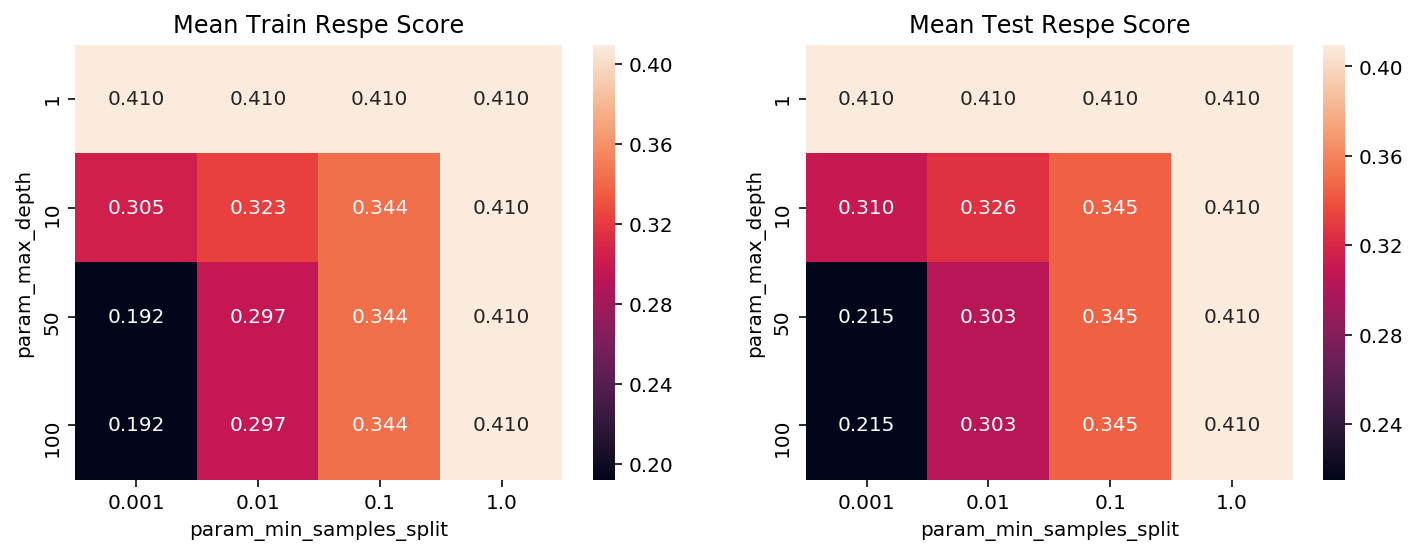

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Tree = DecisionTreeRegressor(min_samples_leaf=4)
parameters = {'max_depth':[1,10,50,100],
              'min_samples_split':[0.001,0.01,0.1,1.0]}

Tree_grid_search = GridSearchCV(Tree, parameters, scoring=respe_scorer, 
                                cv=5, n_jobs=-1, return_train_score=True)
print('Fitting model...\n')
Tree_grid_search.fit(X_train[:80000], y_train[:80000])

from help import save_model
Model = Tree_grid_search
FileName = 'Tree_grid_search'
# save_model(Model,FileName)

from help import train_test_score
train_test_score(Model,X=X,y=y)

from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())],same_axis=False)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Tree = DecisionTreeRegressor(min_samples_leaf=4)
parameters = {'max_depth':[29,30,31,32],
              'min_samples_split':[19,20,21,22]}

Tree_grid_search = GridSearchCV(Tree, parameters, scoring=respe_scorer, 
                                cv=5, n_jobs=-1, return_train_score=True)
print('Fitting model...\n')
Tree_grid_search.fit(X_train[:80000], y_train[:80000])

from help import save_model
Model = Tree_grid_search
FileName = 'Tree_grid_search'
save_model(Model,FileName)

Fitting model...

Tree_grid_search.best_estimator_:
   DecisionTreeRegressor(criterion='mse', max_depth=32, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=21, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 

The Model have been save in  ['Model_Parameter/Tree_grid_search.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.



Calculating train score...
  train rmspe score:  0.24461854313637868 

Calculating test score...
  test rmspe score:  0.20294627052529376 



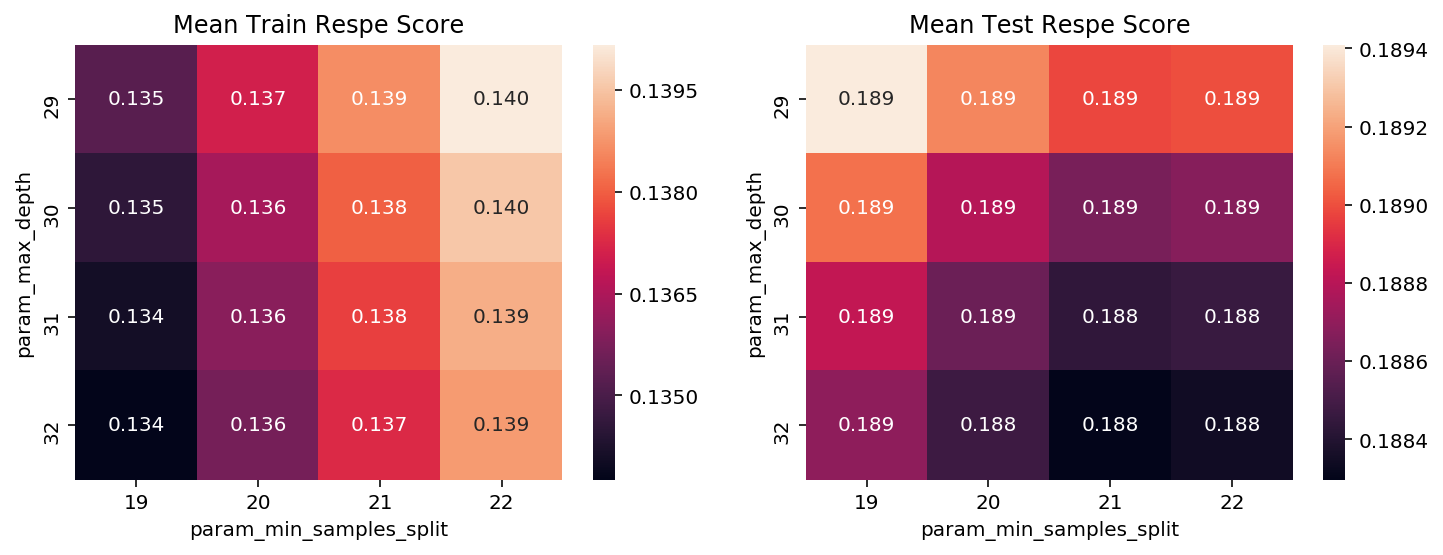

In [50]:
from help import train_test_score
train_test_score(Model,X=X,y=y)

from help import visual_result
visual_result(Model, ['param_'+i for i in list(parameters.keys())],same_axis=False)

In [102]:
from sklearn.tree import DecisionTreeRegressor

Tree_reduce = DecisionTreeRegressor(max_depth=32,min_samples_leaf=4,min_samples_split=21)

print('Fitting model...\n')
Tree_reduce.fit(X_train_reduce, y_train)

from help import save_model
Model = Tree_reduce
FileName = 'Tree_reduce'
save_model(Model,FileName,Best_Model=False)

from help import train_test_score
train_test_score(Model,X=X_reduce,y=y)

Fitting model...

The Model have been save in  ['Model_Parameter/Tree_reduce.pkl']
  PS: To load model, use command: 'Model = joblib.load(FileName)'.

Calculating train score...
  train rmspe score:  0.06589451534700336 

Calculating test score...
  test rmspe score:  0.06686590076014698 



## [KNN](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

sklearn.neighbors.KNeighborsRegressor